In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, zero_one_loss, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot
from imblearn.under_sampling import NearMiss

In [2]:
#Reading the file and splitting our target column
df = pd.read_csv (r'bank-additional\bank-additional-clusters.csv')   

#categories_filter = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

#for x in categories_filter:
#    df.drop(df.index[df[x] == 'unknown'], inplace=True)

features = df.iloc[:, 0:29]
tussen = df.iloc[:, 29]
target = tussen.copy()
y = pd.get_dummies(target, drop_first=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

print(features)
#print(y)
#print(df)

             0    1         2         3         4         5         6  \
0     3.573310  0.0  2.180196 -0.473917 -0.098404 -0.580834 -0.286953   
1     3.573310  0.0  2.180196 -0.473917 -0.098404 -0.580834 -0.286953   
2     3.573310  0.0  2.180196 -0.473917 -0.098404 -0.580834 -0.286953   
3    -0.279853  0.0  2.180196 -0.473917 -0.098404 -0.580834 -0.286953   
4     3.573310  0.0  2.180196 -0.473917 -0.098404 -0.580834 -0.286953   
...        ...  ...       ...       ...       ...       ...       ...   
9275 -0.279853  0.0 -0.458674 -0.473917 -0.098404 -0.580834 -0.286953   
9276 -0.279853  0.0 -0.458674 -0.473917 -0.098404 -0.580834 -0.286953   
9277 -0.279853  0.0 -0.458674 -0.473917 -0.098404 -0.580834 -0.286953   
9278 -0.279853  0.0 -0.458674 -0.473917 -0.098404 -0.580834 -0.286953   
9279 -0.279853  0.0 -0.458674 -0.473917 -0.098404 -0.580834 -0.286953   

            7         8         9  ...   19   20   21   22   23   24   25  \
0    -0.18372  1.902423 -0.287173  ...  0.0  1

In [3]:
# define lists to collect scores
train_scores, test_scores = list(), list()
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

In [4]:
train_features, test_features, train_targets, test_targets = train_test_split(features, y.values.ravel(), test_size=0.2,
                                                                                  random_state=23)
ensemble = GradientBoostingClassifier(max_depth=1, n_estimators=1 ,random_state=23).fit(
        train_features, train_targets)

#After the first run we make jumps of 100, 10 and lastly 1 for n_estimator

param_grid = {'learning_rate': [0.1, 0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)]
              , 'n_estimators': range(1,6001,1000),
             'max_depth': [1,2,3,4,5,6,7,8,9]}
grid = GridSearchCV(ensemble,param_grid,refit=True, scoring='roc_auc' ,verbose =2)
grid.fit(train_features,train_targets)
print(grid.best_estimator_)
print(grid.best_params_)

grid_predictions = grid.predict(test_features)
print(confusion_matrix(test_targets,grid_predictions))
print(classification_report(test_targets,grid_predictions))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   3.2s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   2.4s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   2.2s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   2.2s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   2.2s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=2001; total time=   4.5s
[CV] END ..learning_rate=0.1, max_depth=1, n_

[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2001; total time=  10.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2001; total time=  10.2s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2001; total time=  10.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2001; total time=  10.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=3001; total time=  15.1s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=3001; total time=  14.9s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=3001; total time=  15.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=3001; total time=  14.9s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=3001; total time=  15.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=4001; total time=  20.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=4001; total time=  20.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=4001; total time=  20.1s
[CV] END ..learning_rate=0.1

[CV] END ..learning_rate=0.1, max_depth=7, n_estimators=4001; total time=  36.1s
[CV] END ..learning_rate=0.1, max_depth=7, n_estimators=4001; total time=  35.3s
[CV] END ..learning_rate=0.1, max_depth=7, n_estimators=5001; total time=  43.9s
[CV] END ..learning_rate=0.1, max_depth=7, n_estimators=5001; total time=  43.5s
[CV] END ..learning_rate=0.1, max_depth=7, n_estimators=5001; total time=  43.6s
[CV] END ..learning_rate=0.1, max_depth=7, n_estimators=5001; total time=  44.5s
[CV] END ..learning_rate=0.1, max_depth=7, n_estimators=5001; total time=  43.7s
[CV] END .....learning_rate=0.1, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ..learning_rate=0.1

[CV] END .learning_rate=0.01, max_depth=2, n_estimators=1001; total time=   2.8s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=1001; total time=   2.7s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=1001; total time=   2.7s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=1001; total time=   2.8s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=1001; total time=   2.8s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=2001; total time=   5.7s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=2001; total time=   5.6s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=2001; total time=   5.6s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=2001; total time=   5.7s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=2001; total time=   5.6s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=3001; total time=   8.6s
[CV] END .learning_rate=0.01, max_depth=2, n_estimators=3001; total time=   8.4s
[CV] END .learning_rate=0.01

[CV] END .learning_rate=0.01, max_depth=5, n_estimators=3001; total time=  18.6s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=3001; total time=  18.5s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=3001; total time=  18.7s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=4001; total time=  24.9s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=4001; total time=  24.9s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=4001; total time=  24.9s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=4001; total time=  24.9s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=4001; total time=  25.1s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=5001; total time=  31.2s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=5001; total time=  31.2s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=5001; total time=  31.2s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=5001; total time=  31.0s
[CV] END .learning_rate=0.01

[CV] END .learning_rate=0.01, max_depth=8, n_estimators=5001; total time=  56.6s
[CV] END ....learning_rate=0.01, max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=9, n_estimators=1; total time=   0.0s
[CV] END .learning_rate=0.01, max_depth=9, n_estimators=1001; total time=  13.5s
[CV] END .learning_rate=0.01, max_depth=9, n_estimators=1001; total time=  12.9s
[CV] END .learning_rate=0.01, max_depth=9, n_estimators=1001; total time=  13.1s
[CV] END .learning_rate=0.01, max_depth=9, n_estimators=1001; total time=  13.2s
[CV] END .learning_rate=0.01, max_depth=9, n_estimators=1001; total time=  13.2s
[CV] END .learning_rate=0.01, max_depth=9, n_estimators=2001; total time=  27.4s
[CV] END .learning_rate=0.01

[CV] END learning_rate=0.001, max_depth=3, n_estimators=2001; total time=   7.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=2001; total time=   7.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=2001; total time=   7.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=2001; total time=   7.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=3001; total time=  11.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=3001; total time=  11.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=3001; total time=  11.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=3001; total time=  11.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=3001; total time=  11.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=4001; total time=  14.8s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=4001; total time=  14.8s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=4001; total time=  14.7s
[CV] END learning_rate=0.001

[CV] END learning_rate=0.001, max_depth=6, n_estimators=4001; total time=  28.4s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=4001; total time=  28.8s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=5001; total time=  36.4s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=5001; total time=  35.9s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=5001; total time=  36.1s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=5001; total time=  36.0s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=5001; total time=  36.5s
[CV] END ...learning_rate=0.001, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.001, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.001, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.001, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=0.001, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.001

[CV] END learning_rate=0.0001, max_depth=1, n_estimators=1001; total time=   1.6s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=1001; total time=   1.6s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=1001; total time=   1.6s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=1001; total time=   1.6s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=1001; total time=   1.6s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=2001; total time=   3.3s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=2001; total time=   3.4s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=2001; total time=   3.4s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=2001; total time=   3.3s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=2001; total time=   3.3s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=3001; total time=   5.0s
[CV] END learning_rate=0.0001, max_depth=1, n_estimators=3001; total time=   5.1s
[CV] END learnin

[CV] END learning_rate=0.0001, max_depth=4, n_estimators=3001; total time=  14.0s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=3001; total time=  13.9s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=3001; total time=  14.0s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=3001; total time=  14.0s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=4001; total time=  18.7s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=4001; total time=  18.6s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=4001; total time=  18.6s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=4001; total time=  18.7s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=4001; total time=  18.6s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=5001; total time=  23.2s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=5001; total time=  24.1s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=5001; total time=  23.3s
[CV] END learnin

[CV] END learning_rate=0.0001, max_depth=7, n_estimators=5001; total time=  38.9s
[CV] END learning_rate=0.0001, max_depth=7, n_estimators=5001; total time=  39.4s
[CV] END learning_rate=0.0001, max_depth=7, n_estimators=5001; total time=  42.3s
[CV] END ..learning_rate=0.0001, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ..learning_rate=0.0001, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ..learning_rate=0.0001, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ..learning_rate=0.0001, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ..learning_rate=0.0001, max_depth=8, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=8, n_estimators=1001; total time=   8.8s
[CV] END learning_rate=0.0001, max_depth=8, n_estimators=1001; total time=   8.6s
[CV] END learning_rate=0.0001, max_depth=8, n_estimators=1001; total time=   8.6s
[CV] END learning_rate=0.0001, max_depth=8, n_estimators=1001; total time=   8.9s
[CV] END learning_rat

[CV] END learning_rate=1e-05, max_depth=2, n_estimators=1001; total time=   2.7s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=1001; total time=   2.7s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=2001; total time=   5.3s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=2001; total time=   5.3s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=2001; total time=   5.3s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=2001; total time=   5.3s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=2001; total time=   5.3s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=3001; total time=   8.0s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=3001; total time=   8.0s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=3001; total time=   8.0s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=3001; total time=   8.1s
[CV] END learning_rate=1e-05, max_depth=2, n_estimators=3001; total time=   8.0s
[CV] END learning_rate=1e-05

[CV] END learning_rate=1e-05, max_depth=5, n_estimators=4001; total time=  22.6s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=4001; total time=  22.4s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=4001; total time=  22.5s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=4001; total time=  22.2s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=4001; total time=  22.8s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=5001; total time=  28.1s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=5001; total time=  28.3s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=5001; total time=  28.7s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=5001; total time=  28.3s
[CV] END learning_rate=1e-05, max_depth=5, n_estimators=5001; total time=  29.1s
[CV] END ...learning_rate=1e-05, max_depth=6, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=1e-05, max_depth=6, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=1e

[CV] END learning_rate=1e-05, max_depth=9, n_estimators=1001; total time=   9.9s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=1001; total time=   9.6s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=1001; total time=   9.8s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=1001; total time=   9.7s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=1001; total time=  10.3s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=2001; total time=  19.9s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=2001; total time=  19.3s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=2001; total time=  20.0s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=2001; total time=  20.0s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=2001; total time=  21.0s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=3001; total time=  30.4s
[CV] END learning_rate=1e-05, max_depth=9, n_estimators=3001; total time=  29.4s
[CV] END learning_rate=1e-05

[CV] END learning_rate=1e-06, max_depth=3, n_estimators=3001; total time=  11.0s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=3001; total time=  10.9s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=3001; total time=  10.9s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=4001; total time=  14.5s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=4001; total time=  14.5s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=4001; total time=  14.6s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=4001; total time=  14.6s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=4001; total time=  14.6s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=5001; total time=  18.2s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=5001; total time=  18.1s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=5001; total time=  18.3s
[CV] END learning_rate=1e-06, max_depth=3, n_estimators=5001; total time=  18.2s
[CV] END learning_rate=1e-06

[CV] END learning_rate=1e-06, max_depth=6, n_estimators=5001; total time=  34.3s
[CV] END ...learning_rate=1e-06, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=1e-06, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=1e-06, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=1e-06, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END ...learning_rate=1e-06, max_depth=7, n_estimators=1; total time=   0.0s
[CV] END learning_rate=1e-06, max_depth=7, n_estimators=1001; total time=   7.7s
[CV] END learning_rate=1e-06, max_depth=7, n_estimators=1001; total time=   7.7s
[CV] END learning_rate=1e-06, max_depth=7, n_estimators=1001; total time=   7.7s
[CV] END learning_rate=1e-06, max_depth=7, n_estimators=1001; total time=   7.5s
[CV] END learning_rate=1e-06, max_depth=7, n_estimators=1001; total time=   8.0s
[CV] END learning_rate=1e-06, max_depth=7, n_estimators=2001; total time=  15.4s
[CV] END learning_rate=1e-06

In [5]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.938241 using {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1001}


1.0000000, train: 0.819, test: 0.794
101.0000000, train: 0.872, test: 0.854
201.0000000, train: 0.888, test: 0.866
301.0000000, train: 0.892, test: 0.869
401.0000000, train: 0.894, test: 0.872
501.0000000, train: 0.899, test: 0.877
601.0000000, train: 0.901, test: 0.881
701.0000000, train: 0.904, test: 0.883
801.0000000, train: 0.907, test: 0.885
901.0000000, train: 0.907, test: 0.886
1001.0000000, train: 0.909, test: 0.884
1101.0000000, train: 0.910, test: 0.887
1201.0000000, train: 0.912, test: 0.887
1301.0000000, train: 0.912, test: 0.887
1401.0000000, train: 0.914, test: 0.889


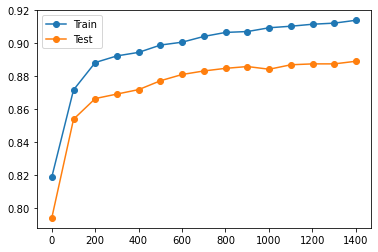

In [10]:
train_features, test_features, train_targets, test_targets = train_test_split(features, y.values.ravel(), test_size=0.2,
                                                                                  random_state=23)

# define lists to collect scores
train_scores, test_scores = list(), list()
#Now we set our n_estimator and learning_rate to the optimal value found in the last grid search
learningRate = 0.01
nEstimator = 1001
maxDepth = 6

#Check for overfitting

# define the tree depths to evaluate
values = [i for i in range_with_floats(1, 1501, 100)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth= maxDepth, learning_rate = learningRate, n_estimators=i, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = roc_auc_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('%.7f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [11]:
#Boosting the tree and predicting with ROC curve and classification reports
def gradient_boosted_tree(features, targets, learningRate, nEstimator):
    train_features, test_features, train_targets, test_targets = train_test_split(features, y.values.ravel(), test_size=0.2,
                                                                                  random_state=23)
    ensemble = GradientBoostingClassifier(max_depth=maxDepth, learning_rate = learningRate, n_estimators= nEstimator ,random_state=23)
    
    k = 10
    kf = KFold(n_splits=k, shuffle = True)

    
    dt_scores = cross_val_score(ensemble, train_features, train_targets, scoring ='roc_auc' ,cv = kf)
    print("mean cross validation score: {}".format(np.round(np.mean(dt_scores),3)))

    ensemble.fit(train_features, train_targets)
    predictions = ensemble.predict(test_features)
    
    print("Confusion Matrix:")
    print(confusion_matrix(test_targets, predictions))

    print("Classification Report")
    print(classification_report(test_targets, predictions))
    
    #Beginning the plotting of ROC-curve
    pred_prob = ensemble.predict_proba(test_features)
    fpr, tpr, thresh = roc_curve(test_targets, pred_prob[:,1], pos_label=1)
    
    #Plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Boosted Trees')

    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();
    
    #AUC Score
    auc_score = roc_auc_score(test_targets, pred_prob[:,1])
    print("AUC Score: " + str(np.round(auc_score , 3)))

mean cross validation score: 0.939
Confusion Matrix:
[[885  50]
 [164 757]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       935
           1       0.94      0.82      0.88       921

    accuracy                           0.88      1856
   macro avg       0.89      0.88      0.88      1856
weighted avg       0.89      0.88      0.88      1856



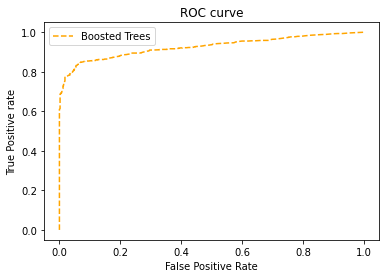

AUC Score: 0.926


In [12]:
gradient_boosted_tree(features, y.values.ravel(), learningRate, nEstimator)